In [1]:
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel

from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

# Chapter 07

In this chapter we focus on the full four-steps causal inference process. First, we introduce DoWhy and EconML libraries. Next, we discuss and exercise how to encode causal information in a form of a graph that is understandable to DoWhy. Next, we demonstrate how to find applicable estimands for a problem at hand. Then, we compute causal effect estimates using DoWhy and estimators provided in EconML. To understand how good our estimates are, we perform a series of refutal tests. Finally, we run a full (and more complex) causal process using DoWhy and EconML.

## Causal model with DoWhy & EconML

### Generate a dataset

In [3]:
# Create the dataset
W = np.random.randn(1000)
T = np.random.randn(1000) + .2*W + 3
Y = 6*T + 2*W - 13

df = pd.DataFrame(np.vstack([W, T, Y]).T, columns=['W', 'T', 'Y'])

In [4]:
df

,W,T,Y
0,0.188479,3.902697,10.793140
1,-0.307869,3.977517,10.249363
2,-1.239661,2.721596,0.850253
3,-0.200529,2.039783,-1.162362
4,0.410414,5.118318,18.530734
...,...,...,...
995,0.824110,3.208011,7.896287
996,0.872309,3.071773,7.175253
997,0.207322,6.031866,23.605839
998,2.821812,4.569173,20.058662


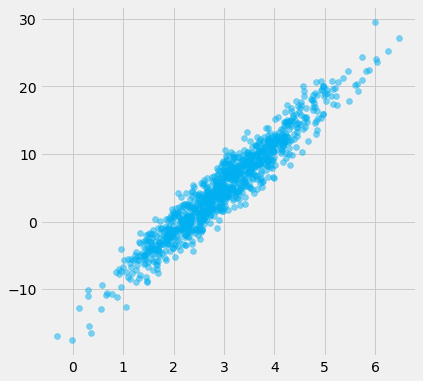

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(df['T'], df['Y'], alpha=.5, color=COLORS[0])
plt.show()

### Stage 1: Model the problem

#### Stage 1.1 - Define the graph - `GML`

In [6]:
# Create the graph describing the causal structure
graph = """
graph [
    directed 1
    
    node [
        id "T" 
        label "T"
    ]    
    node [
        id "W"
        label "W"
    ]
    node [
        id "Y"
        label "Y"
    ]
    
    edge [
        source "W"
        target "T"
    ]
    
    edge [
        source "W"
        target "Y"
    ]
    
    edge [
        source "T"
        target "Y"
    ]
]
"""

In [7]:
# Remove newlines
graph = graph.replace('\n', '')

#### Stage 1.2 - define the DoWhy model

In [8]:
# With graph
model = CausalModel(
    data=df,
    treatment='T',
    outcome='Y',
    graph=graph
)

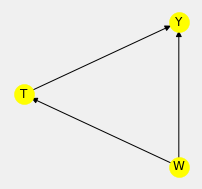

In [9]:
plt.figure(figsize=(3, 3))
model.view_model()
plt.show()

## Stage 2: Identify the estimand

In [10]:
estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                    
────(Expectation(Y|W))
d[T]                  
Estimand assumption 1, Unconfoundedness: If U→{T} and U→Y then P(Y|T,W,U) = P(Y|T,W)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



## Stage 3: Estimate the causal effect

#### Example 1 - Linear Regression

In [11]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.linear_regression'
)

print(f'Estimate of causal effect (linear regression): {estimate.value}')

Estimate of causal effect (linear regression): 5.999999999999994


#### Example 3 - Double Machne Learning

In [12]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.dml.DML',
    method_params={
        'init_params': {
            'model_y': GradientBoostingRegressor(),
            'model_t': GradientBoostingRegressor(),
            'model_final': LassoCV(fit_intercept=False),
        },
        'fit_params': {}}
)

print(f'Estimate of causal effect (DML): {estimate.value}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Estimate of causal effect (DML): 5.989805370210192


## Stage 4: Run refutation tests

In [13]:
refute_results = model.refute_estimate(
    estimand=estimand, 
    estimate=estimate,
    method_name='placebo_treatment_refuter'
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [14]:
print(refute_results)

Refute: Use a Placebo Treatment
Estimated effect:5.989805370210192
New effect:0.0
p value:1.0



In [15]:
refute_results = model.refute_estimate(
    estimand=estimand, 
    estimate=estimate,
    method_name='random_common_cause'
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [16]:
print(refute_results)

Refute: Add a Random Common Cause
Estimated effect:5.989805370210192
New effect:6.020233278010385

